In [1]:
# Importing Libraries
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
import warnings
warnings.filterwarnings('ignore')

### SCRAPING DATA OF REVIEWS FROM AMAZON

In [200]:
# Creating python program to search desired keywords one by one and saving links in open list prod_url

# creating open list to save href links of all products 
prod_url = []

# Keywords for search to which we need to scrape the data.
keywords = ['Laptops', 'Phones', 'Headphones', 'Smart Watches', 'Cameras', 'Printers', 'Monitors','Home theater', 'Router']

# Location of chrome web driver and launching it
driver = webdriver.Chrome("C://chromedriver.exe") 

# website from which we will scrape data
driver.get("https://www.amazon.in/") 

initial_url = driver.current_url

# loop for sending keywords to website and scraping href
for i in keywords:
    # Finding search input and giving input
    search = driver.find_element_by_id("twotabsearchtextbox").send_keys(i)
        
    # clicking on search button
    search_btn = driver.find_element_by_xpath("//div[@class='nav-search-submit nav-sprite']")
    search_btn.click()
    # giving time to load the webpage completely to avoid errors
    time.sleep(5)
    # finding href of each products mentioned in keywords
    for j in driver.find_elements_by_xpath("//h2[@class = 'a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a"):
        prod_url.append(j.get_attribute('href'))
    # returning to initial url    
    driver.get(initial_url)

In [201]:
# checking length of prod_url
len(prod_url)

226

In [202]:
# opening each 226 prod_url and scraping links of all reviews href 
# open list to save all reviews href
rev_cli = []

# loop for opening all links stored in prod_url
for j in prod_url:
    # opening each links of prod_url one by one
    driver.get(j)
    
    try:
        # finding links from all webpage by xpath
        for k in driver.find_elements_by_xpath("//a[@id = 'acrCustomerReviewLink']"):
            rev_cli.append(k.get_attribute('href'))
    # if all reviews link is not available, it will continue to next page,so avoiding NoSuchElementException 
    except NoSuchElementException as e:
        continue

In [203]:
# Checking length of open list
len(rev_cli)

423

In [ ]:
# Now opening each links as stored in list above
# creating open list for storing all reviews href
all_reviews = []

for l in rev_cli:
    # opening each links as stored in cli_rev open list
    driver.get(l)
    time.sleep(3)
    
    try:
        # finding links from all webpage by xpath
        all_rev = driver.find_element_by_xpath("//div[@id = 'reviews-medley-footer']/div[2]/a")
        all_reviews.append(all_rev.get_attribute('href'))
        # if all reviews link is not available, it will continue to next page,so avoiding NoSuchElementException 
    except NoSuchElementException as e:
        continue

In [89]:
# Checking length of all reviews link
len(all_reviews)

409

In [90]:
# finally opening all_reviews link and scraping ratings and reviews data from all webpages.
# creating open list to save scraped data
ratings = []
reviews = []

# opening each link to begin the scaping
for m in all_reviews:
    driver.get(m)
    time.sleep(15)
    
    # loop to open link till page 5 and scraping data of reviews and ratings of products
    for n in range(0,5):
        for o in driver.find_elements_by_xpath("//div[@class = 'a-section review aok-relative']/div/div/div[2]/a[1]"):
            ratings.append(o.get_attribute('title').replace(' out of 5 stars',''))
            
        for p in driver.find_elements_by_xpath("//div[@class = 'a-section review aok-relative']/div/div/div[4]/span/span"):
            reviews.append(p.text)
                        
        try:
            next_page = driver.find_element_by_xpath("//ul[@class = 'a-pagination']/li[2]/a")
            driver.get(next_page.get_attribute('href'))
        except NoSuchElementException as e:
            continue

In [114]:
# saving scraped data into dataframe.
search = pd.DataFrame({}) 
search['Ratings'] = ratings[:18446]
search['Full_review'] = reviews[:18446]
search

,Ratings,Full_review
0,4.0,Received this yesterday (04/03/2021). Prompt d...
1,1.0,Different charger was sent in the box by Amazo...
2,5.0,Amazing laptop.. I ordered this laptop on its ...
3,4.0,As soon as I found 11gen Gen i5 at ~62K I got ...
4,5.0,"I bought this a few days ago, and I am glad I ..."
...,...,...
18441,1.0,Compact and pocket friendly impactful works fo...
18442,4.0,The product is interrupting normal power suppl...
18443,1.0,Charge it fully before plugging in your router...
18444,5.0,I have bought this product for the support to ...


In [ ]:
# Saving scraped data in csv format
search.to_csv('Ratings_Prediction_Amazon.csv')

### SCRAPING DATA FROM FLIPKART

In [205]:
# Creating python program to search desired keywords one by one and saving links in open list prod_url

# creating open list to save href links of all products 

prod_url = []

# Keywords for search to which we need to scrape the data.
keywords = ['Laptops', 'Phones', 'Headphones', 'Smart Watches', 'Cameras', 'Printers', 'Monitors','Home theater', 'Router']

# Location of chrome web driver and launching it
driver = webdriver.Chrome("C://chromedriver.exe")
# Website from which we have to scrape data
driver.get("https://www.flipkart.com/") 

# Closing login pop-up
pop_btn = driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()

# The program will return to present website and will change the search keyword 
initial_url = driver.current_url

# loop for sending keywords to website and scraping href
for i in keywords:
    # finding search job tab and giving input of desired products as mentioned in keywords
    search = driver.find_element_by_xpath("//input[@type = 'text']").send_keys(i)
    
    
    # Clicking on Search button
    search_btn = driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()
    time.sleep(3)
    
    # scraping href of all products
    for j in driver.find_elements_by_xpath("//a[@class = '_1fQZEK' or @class = '_2rpwqI']"):
        prod_url.append(j.get_attribute('href'))
        
    driver.get(initial_url)

In [206]:
# checking length of prod_url
len(prod_url)

296

In [207]:
# opening each 296 prod_url and scraping links of all reviews href 
# open list to save all reviews href
rev_cli = []

# loop for opening all links stored in prod_url
for j in prod_url:
    # opening each links of prod_url one by one
    driver.get(j)
    
    try:
        # finding links from all webpage by xpath
        allrev = driver.find_element_by_xpath("//div[@class = 'col JOpGWq']/a")
        ur = allrev.get_attribute('href')
        rev_cli.append(ur)
    # if all reviews link is not available, it will continue to next page,so avoiding NoSuchElementException 
    except NoSuchElementException as e:
        continue

In [208]:
# Checking length of open list
len(rev_cli)

268

In [209]:
# opening each url and scraping links of all reviews href 
# open list to save all reviews href
next_cli = []

for r in rev_cli:
    driver.get(r)
    # Extracting href and appending it to a list
    for s in driver.find_elements_by_xpath("//a[@class = 'ge-49M' or @class = 'ge-49M _2Kfbh8']"):
        next_cli.append(s.get_attribute('href'))

In [ ]:
# finally opening all_reviews link and scraping ratings and reviews data from all webpages.
# creating open list to save scraped data
ratings_1 = []
full_review = []

# Loop for opening each href and scrap the data
for b in next_cli:
    driver.get(b)
    time.sleep(15)
    
    # xpath for scraping ratings
    for j in driver.find_elements_by_xpath("//div[@class='col']/div/div[1]/div"):
        ratings_1.append(j.text) # appending scraped data in ratings_1 list
    
    # xpath for scraping full_review
    for k in driver.find_elements_by_xpath("//div[@class = 't-ZTKy']/div/div"):
        full_review.append(k.text.replace('\n'," ")) # appending scraped data in full_review list

In [113]:
# Creating a dataframe and saving scraped data into it
Reviews = pd.DataFrame({})
Reviews['Ratings'] = ratings_1[:21037]
Reviews['Full_review'] = full_review[:21037]
Reviews

,Ratings,Full_review
0,4.5,Osm experience of msi I am very happy to see t...
1,★,Pros Very good build quality Looks very premiu...
2,5,I was confused between Lenovo ideapad 5 ryzen ...
3,5,"Received the laptop just today, it's a beautif..."
4,4,body-top is made of metal bottom is made of ha...
...,...,...
21032,5,Excellent product. Very much happy about the p...
21033,4.4,Extremely simple and easy to install and provi...
21034,★,Very good product 👌. easy to setup and very us...
21035,5,very good product


In [116]:
# concating two dataframe of scraped data from Amazon and Flipkart
comp_review = pd.concat([search,Reviews],axis = 0)

In [117]:
comp_review

,Ratings,Full_review
0,4.0,Received this yesterday (04/03/2021). Prompt d...
1,1.0,Different charger was sent in the box by Amazo...
2,5.0,Amazing laptop.. I ordered this laptop on its ...
3,4.0,As soon as I found 11gen Gen i5 at ~62K I got ...
4,5.0,"I bought this a few days ago, and I am glad I ..."
...,...,...
21032,5,Excellent product. Very much happy about the p...
21033,4.4,Extremely simple and easy to install and provi...
21034,★,Very good product 👌. easy to setup and very us...
21035,5,very good product


In [118]:
# Saving scraped data to csv
comp_review.to_csv('Ratings_Prediction.csv')

### LOADING DATASET FOR PRE-PROCESSING

In [653]:
# Loading Ratings_Prediction_Amazon.csv data
ds = pd.read_csv('Ratings_Prediction_Amazon.csv')

In [655]:
# loading top 5 data of dataset
ds.head()

,Unnamed: 0,Ratings,Review
0,0,1,Worst laptop. It takes 80 seconds to boot. Whe...
1,1,5,I have used this laptop about it for day there...
2,2,2,You must buy it. But one thing is dispointing ...
3,3,2,After using almost a month my observations.\nL...
4,4,1,i5 10TH GENERATION NOT UPTO THE MARK


In [656]:
# checking info of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18436 entries, 0 to 18435
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18436 non-null  int64 
 1   Ratings     18436 non-null  int64 
 2   Review      18233 non-null  object
dtypes: int64(2), object(1)
memory usage: 432.2+ KB


In [657]:
# dropping unwanted column Unnamed: 0
ds.drop('Unnamed: 0', axis = 1,inplace = True)

In [661]:
# checking unique data of ratings column
ds['Ratings'].unique()

array([1, 5, 2, 3, 4], dtype=int64)

5    7424
1    5195
4    3018
3    1719
2    1080
Name: Ratings, dtype: int64

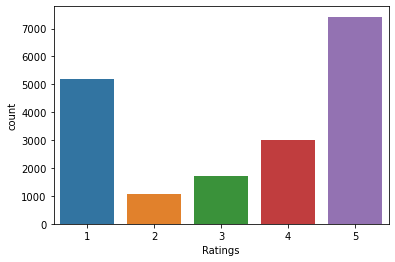

In [663]:
# Let's see how our Target column is distributed
import seaborn as sns
sns.countplot('Ratings',data=ds)

ds['Ratings'].value_counts()

Observations:
    
    1) There are 7424 data available for 5 star ratings
    
    2) There are 3018 data available for 4 star ratings
    
    3) There are 5195 data available for 1 star ratings
    
    4) There are 1719 data available for 3 star ratings
    
    5) There are 1080 data available for 2 star ratings

In [665]:
# Checking Shape of dataset
print ('Shape = >',ds.shape)

Shape = > (18436, 2)


## DATASET PREPROCESSING

In [667]:
# Changing datatype of Review column
ds['Review'] = ds['Review'].astype(str)

In [668]:
# 1. Remove HTML tags
#Regex rule : ‘<.*?>’

def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text) # substring replace with ''(space)

ds.Review = ds.Review.apply(clean)
ds.Review

0        Worst laptop. It takes 80 seconds to boot. Whe...
1        I have used this laptop about it for day there...
2        You must buy it. But one thing is dispointing ...
3        After using almost a month my observations.\nL...
4                     i5 10TH GENERATION NOT UPTO THE MARK
                               ...                        
18431    The router always was a good pick at the price...
18432    Easy to install, good look, good features espe...
18433    Using Airtel Broadband Xstream Fiber and the d...
18434    Pros : Easy to configure. Copies settings and ...
18435    I have Airtel fiber 100Mbps connection and its...
Name: Review, Length: 18436, dtype: object

In [669]:
# 2. Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

ds.Review = ds.Review.apply(is_special)
ds.Review

0        Worst laptop  It takes 80 seconds to boot  Whe...
1        I have used this laptop about it for day there...
2        You must buy it  But one thing is dispointing ...
3        After using almost a month my observations  Lo...
4                     i5 10TH GENERATION NOT UPTO THE MARK
                               ...                        
18431    The router always was a good pick at the price...
18432    Easy to install  good look  good features espe...
18433    Using Airtel Broadband Xstream Fiber and the d...
18434    Pros   Easy to configure  Copies settings and ...
18435    I have Airtel fiber 100Mbps connection and its...
Name: Review, Length: 18436, dtype: object

In [670]:
# 3. Convert everything to lowercase
def to_lower(text):
    return text.lower()

ds.Review = ds.Review.apply(to_lower)
ds.Review

0        worst laptop  it takes 80 seconds to boot  whe...
1        i have used this laptop about it for day there...
2        you must buy it  but one thing is dispointing ...
3        after using almost a month my observations  lo...
4                     i5 10th generation not upto the mark
                               ...                        
18431    the router always was a good pick at the price...
18432    easy to install  good look  good features espe...
18433    using airtel broadband xstream fiber and the d...
18434    pros   easy to configure  copies settings and ...
18435    i have airtel fiber 100mbps connection and its...
Name: Review, Length: 18436, dtype: object

In [600]:
# 4 Replacing special characters from Review column

# Replace email addresses with 'email'
ds['Review'] = ds['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

# Replace URLs with 'webaddress'
ds['Review'] = ds['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
ds['Review'] = ds['Review'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
ds['Review'] = ds['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


# Replace numbers with 'numbr'
ds['Review'] = ds['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
ds['Review'] = ds['Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
ds['Review'] = ds['Review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
ds['Review'] = ds['Review'].str.replace(r'^\s+|\s+?$', '')

In [601]:
# 5. Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

ds.Review = ds.Review.apply(rem_stopwords)
ds.Review

0        [worst, laptop, takes, numbr, seconds, boot, c...
1        [used, laptop, day, many, things, defect, lapt...
2        [must, buy, one, thing, dispointing, build, qu...
3        [using, almost, month, observations, lookwise,...
4                [inumbr, numbrth, generation, upto, mark]
                               ...                        
18431    [router, always, good, pick, price, however, b...
18432    [easy, install, good, look, good, features, es...
18433    [using, airtel, broadband, xstream, fiber, def...
18434    [pros, easy, configure, copies, settings, cred...
18435    [airtel, fiber, numbrmbps, connection, install...
Name: Review, Length: 18436, dtype: object

In [602]:
# 6 Lemmatizing and stemming words

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

In [603]:
#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [604]:
# Processing review with above Function
processed_review = []

for doc in ds.Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

18436


[['worst',
  'laptop',
  'take',
  'numbr',
  'second',
  'boot',
  'copi',
  'someth',
  'give',
  'numbrmbp',
  'know',
  'exact',
  'problem',
  'inumbr',
  'processor',
  'numbr',
  'year',
  'old',
  'laptop',
  'would',
  'take',
  'numbr',
  'second',
  'boot',
  'tri',
  'contact',
  'lenovo',
  'servic',
  'team',
  'one',
  'repli'],
 ['use',
  'laptop',
  'day',
  'mani',
  'thing',
  'defect',
  'laptop',
  'first',
  'camera',
  'good',
  'second',
  'usb',
  'type',
  'port',
  'third',
  'activ',
  'offic',
  'contact',
  'lenovo',
  'servic',
  'also',
  'like',
  'design',
  'good',
  'feel',
  'like',
  'metal',
  'touch',
  'lead',
  'keypad',
  'numbrk',
  'good',
  'laptop'],
 ['must',
  'buy',
  'one',
  'thing',
  'dispoint',
  'build',
  'qualiti',
  'budget',
  'numbrk',
  'interest',
  'qualiti',
  'must',
  'take',
  'otherwis',
  'dell',
  'laptop',
  'good',
  'build',
  'qualiti',
  'numbr',
  'week',
  'use',
  'perform',
  'good',
  'pleas',
  'buy']]

In [605]:
# Adding Processed_review column
ds['Processed_review']=processed_review

In [606]:
ds

,Ratings,Review,Processed_review
0,1,"[worst, laptop, takes, numbr, seconds, boot, c...","[worst, laptop, take, numbr, second, boot, cop..."
1,5,"[used, laptop, day, many, things, defect, lapt...","[use, laptop, day, mani, thing, defect, laptop..."
2,2,"[must, buy, one, thing, dispointing, build, qu...","[must, buy, one, thing, dispoint, build, quali..."
3,2,"[using, almost, month, observations, lookwise,...","[use, almost, month, observ, lookwis, good, nu..."
4,1,"[inumbr, numbrth, generation, upto, mark]","[inumbr, numbrth, generat, upto, mark]"
...,...,...,...
18431,5,"[router, always, good, pick, price, however, b...","[router, alway, good, pick, price, howev, buy,..."
18432,4,"[easy, install, good, look, good, features, es...","[easi, instal, good, look, good, featur, espec..."
18433,5,"[using, airtel, broadband, xstream, fiber, def...","[use, airtel, broadband, xstream, fiber, defau..."
18434,1,"[pros, easy, configure, copies, settings, cred...","[pros, easi, configur, copi, set, credenti, ol..."


In [607]:
# making changes to original column.
ds['Review'] = ds['Processed_review'].apply(lambda x:' '.join(y for y in x))

In [608]:
ds

,Ratings,Review,Processed_review
0,1,worst laptop take numbr second boot copi somet...,"[worst, laptop, take, numbr, second, boot, cop..."
1,5,use laptop day mani thing defect laptop first ...,"[use, laptop, day, mani, thing, defect, laptop..."
2,2,must buy one thing dispoint build qualiti budg...,"[must, buy, one, thing, dispoint, build, quali..."
3,2,use almost month observ lookwis good numbr ram...,"[use, almost, month, observ, lookwis, good, nu..."
4,1,inumbr numbrth generat upto mark,"[inumbr, numbrth, generat, upto, mark]"
...,...,...,...
18431,5,router alway good pick price howev buy face di...,"[router, alway, good, pick, price, howev, buy,..."
18432,4,easi instal good look good featur especi mimo ...,"[easi, instal, good, look, good, featur, espec..."
18433,5,use airtel broadband xstream fiber default rou...,"[use, airtel, broadband, xstream, fiber, defau..."
18434,1,pros easi configur copi set credenti old route...,"[pros, easi, configur, copi, set, credenti, ol..."


In [609]:
Re

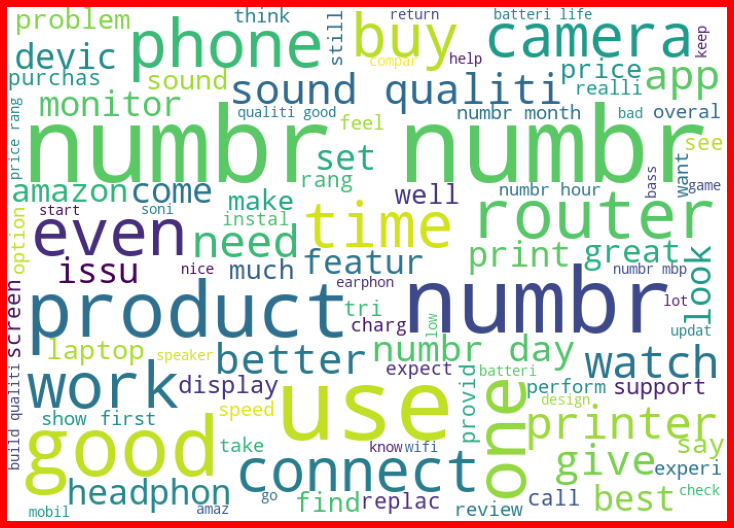

In [610]:
# Getting sense of loud words in Ratings 1 
from wordcloud import WordCloud


one = ds['Review'][ds['Ratings']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

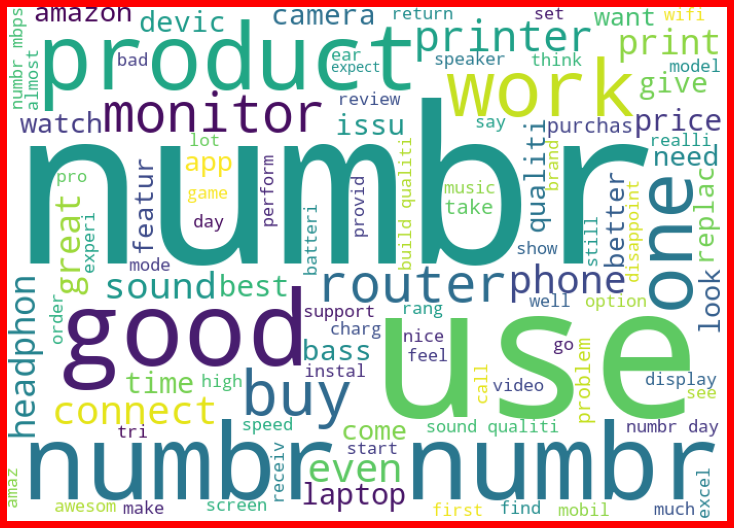

In [611]:
# Getting sense of words in Rating 2
two = ds['Review'][ds['Ratings']==2]

wordcloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(two))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

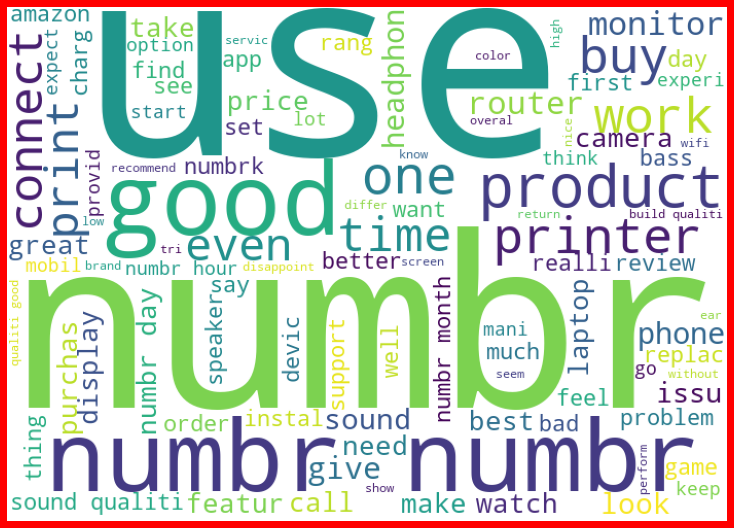

In [612]:
# Getting sense of words in Rating 3
three = ds['Review'][ds['Ratings']==3]

wordcloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(three))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

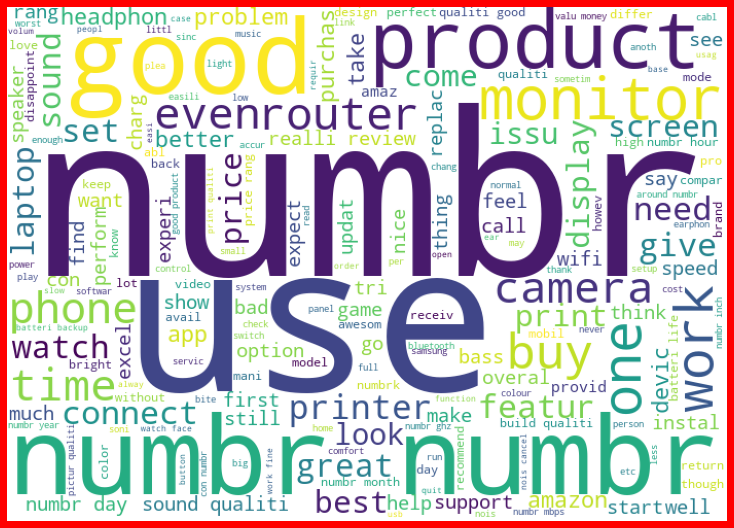

In [613]:
# Getting sense of words in Rating 4
four = ds['Review'][ds['Ratings']==4]

wordcloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(four))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

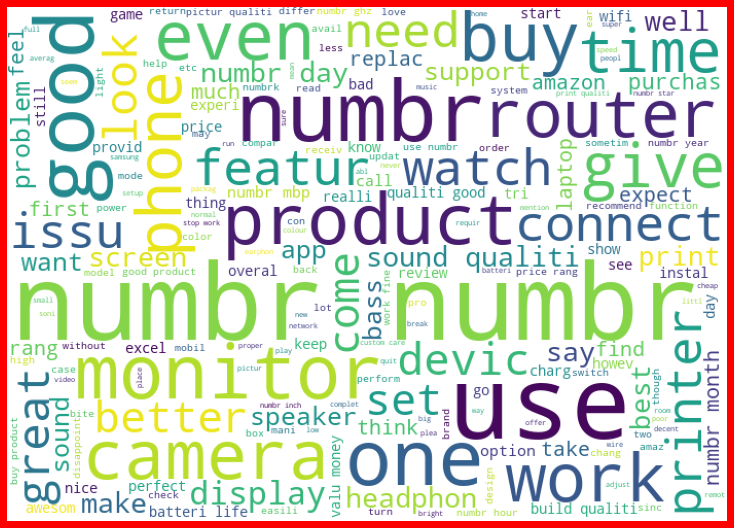

In [614]:
# Getting sense of words in Rating 5
five = ds['Review'][ds['Ratings']==5]

wordcloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [630]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer(max_features=20000,analyzer='char')
features = tf_vec.fit_transform(ds['Review'])

X = features
y = ds['Ratings']
X.shape

(18436, 134)

In [631]:
y.shape

(18436,)

In [625]:
# Libraries for training

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC

In [638]:
# Loop for checking Best Random_State and Model

# models on which we will check our dataset which can give better accuracy
model=[RandomForestClassifier(),DecisionTreeClassifier(),MultinomialNB(),AdaBoostClassifier(),GradientBoostingClassifier(),
      KNeighborsClassifier()]

max_accuscore=0
# Checking best rangom state from range 30 to 200
for rand in range(30,200):
    # splitting our dataset into test and train for checking. 80% of data will be used for training and 20% of data for testing
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=rand)
    for i in model:
        # fitting data to different models
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        accu_sco=accuracy_score(y_test,y_pred) 
        if accu_sco > max_accuscore:
            max_accuscore = accu_sco
            final_state = rand
            final_model= i
        
# printing the best model for our dataset and best random_state with maximum accuracy score
print('max accu_score with random_state',final_state,'is',max_accuscore,'and model is',final_model)

max accu_score with random_state 172 is 0.5322668112798264 and model is RandomForestClassifier()


In [640]:
# got best accuracy of 54% at random state 158. passing it in train test split 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=158)

In [641]:
# Our best model
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.53470715835141
[[ 549   23   46   85  365]
 [  30   71   11   16   80]
 [  49   15  105   37  130]
 [ 115   22   21  244  206]
 [ 242   30   75  118 1003]]
              precision    recall  f1-score   support

           1       0.56      0.51      0.53      1068
           2       0.44      0.34      0.38       208
           3       0.41      0.31      0.35       336
           4       0.49      0.40      0.44       608
           5       0.56      0.68      0.62      1468

    accuracy                           0.53      3688
   macro avg       0.49      0.45      0.47      3688
weighted avg       0.53      0.53      0.53      3688



## CROSS VALIDATION OF BEST MODEL

In [642]:
# Importing library for checking cross validation score
from sklearn.model_selection import cross_val_score

In [644]:
# defining model
rfc = RandomForestClassifier()

# defining parameteres for cross validation of score
sc=cross_val_score(rf,X,y,cv=20)
print('Cross Validation Score is = ',sc*100)
print('Mean is =',sc.mean()*100,'and Standard Deviation is =',sc.std())

Cross Validation Score is =  [37.31019523 38.61171367 42.40780911 31.01952278 20.39045553 24.8373102
 22.99349241 28.30802603 26.68112798 25.27114967 19.95661605 24.62039046
 26.2472885  31.01952278 33.94793926 35.03253796 34.2019544  32.35613464
 35.39630836 38.87079262]
Mean is = 30.474014381237037 and Standard Deviation is = 0.06321752484710676


## HYPER PARAMETER TUNING OF BEST MODEL TO CHECK IF WE CAN IMPROVE OUR SCORE

In [573]:
# Importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [646]:
# defining parameters for tuning
rfcpara={ 
    'max_depth' :[5, 8, 15, 25, 30],
    'n_estimators':[100, 300, 500, 800, 1200],
    "criterion": ["gini", "entropy"]}

# passing above parameters to grid
rfcgrid=GridSearchCV(rfc,param_grid=rfcpara,cv=3,n_jobs=-1)

# fitting the model
rfcgrid.fit(x_train,y_train)
rfcgrid.best_score_

0.4837944128017358

In [651]:
# checking the predicted ratings with actual ratings
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predrf

In [652]:
test

,Ratings,Predicted values
15890,5,5
11303,2,4
7782,3,5
17294,5,5
12039,5,5
...,...,...
10974,1,5
3610,3,1
1940,4,4
4128,1,1


# END